<a href="https://colab.research.google.com/github/karans17s/Practical_Implementation_Of_Deep_learning/blob/main/PHASE_4_CNN_IMPLEMENTING_USING_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Step:1 == First Import Libs..**

### 1) torch lib use :

### -- this lib for tensors and computations

### -- .nn for the neural network , we know that torch special for the DL

### -- .optim means we know that SGD , adam these are optimal algo for process

### 2) about tensor :

### -- numpy with Supportive GPU

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import pandas as pd

# Step : 2 == Connect with GPU

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
device

device(type='cuda')

# Step : 3 == load CSV data

## why use .tensor(data & labels)

### torch module direct not process with numpy arrays , req GPU system for the operation so....

In [ ]:
def load_csv_dataset(csv_path):
    df = pd.read_csv(csv_path)
    data = df.iloc[:, 1:].values.astype('float32')  # Skip the label column
    labels = df.iloc[:, 0].values.astype('int64')  # First column is the label
    data = data / 255.0  # Normalize pixel values to [0, 1]
    data = torch.tensor(data)
    labels = torch.tensor(labels)
    return TensorDataset(data, labels)

In [ ]:
data_frame_train = load_csv_dataset('/content/mnist_train.csv')

In [ ]:
data_frame_train

In [ ]:
data_shape_train = data_frame_train.tensors[0].shape

In [ ]:
data_shape_train

torch.Size([60000, 784])

In [ ]:
data_frame_test = load_csv_dataset('/content/mnist_test.csv')

In [ ]:
data_frame_test

In [ ]:
data_shape_test = data_frame_test.tensors[0].shape

In [ ]:
data_shape_test

torch.Size([10000, 784])

In [ ]:
def print_tensor_dataset_head(dataset, num_rows=5):
    data_tensor, label_tensor = dataset.tensors
    data_df = pd.DataFrame(data_tensor.numpy())
    data_df['label'] = label_tensor.numpy()
    print(data_df.head(num_rows))

In [ ]:
print_tensor_dataset_head(data_frame_train)

     0    1    2    3    4    5    6    7    8    9  ...  775  776  777  778  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   

   779  780  781  782  783  label  
0  0.0  0.0  0.0  0.0  0.0      5  
1  0.0  0.0  0.0  0.0  0.0      0  
2  0.0  0.0  0.0  0.0  0.0      4  
3  0.0  0.0  0.0  0.0  0.0      1  
4  0.0  0.0  0.0  0.0  0.0      9  

[5 rows x 785 columns]


In [ ]:
print_tensor_dataset_head(data_frame_test)

     0    1    2    3    4    5    6    7    8    9  ...  775  776  777  778  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   

   779  780  781  782  783  label  
0  0.0  0.0  0.0  0.0  0.0      7  
1  0.0  0.0  0.0  0.0  0.0      2  
2  0.0  0.0  0.0  0.0  0.0      1  
3  0.0  0.0  0.0  0.0  0.0      0  
4  0.0  0.0  0.0  0.0  0.0      4  

[5 rows x 785 columns]


# Step : 4 == Show the handwritten digits imgs

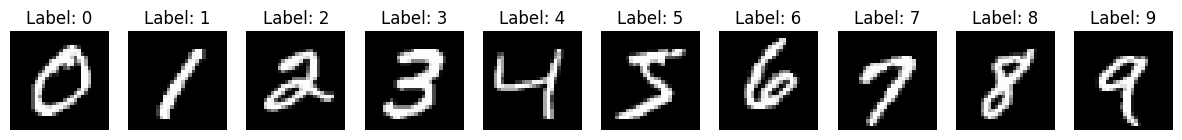

In [ ]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(1, 10, figsize=(15, 4))
found_digits = {}
for img, label in data_frame_train:
    digit = label.item()
    if digit not in found_digits:
        found_digits[digit] = img.reshape(28, 28).numpy()
        axes[digit].imshow(found_digits[digit], cmap='gray')
        axes[digit].set_title(f"Label: {digit}")
        axes[digit].axis('off')
    if len(found_digits) == 10:
        break
plt.show()

# Step : 5 == Hyperparameter Tuning

In [ ]:
batch_size = 64
lr = 0.001
epochs = 50

In [ ]:
from torch.utils.data import DataLoader, TensorDataset

In [ ]:
train_loader = DataLoader(
    data_frame_train,
    batch_size=batch_size,
    shuffle=True
    )
test_loader = DataLoader(
    data_frame_test,
    batch_size=batch_size,
    shuffle=False
    )

# Step : 6 == Define the nn model

### fc1 -- first fully connected layer and fcn so on.....

### 6-fully connected layer

### nn.Linear is a fully connected layer/dense layer) linear transformation.

### output == XW(T) + b

### nn.Linear(in_features, out_features)


In [ ]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
        self.relu1 = nn.ReLU()
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.relu2 = nn.ReLU()
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(64 * 7 * 7, 128)
        self.relu3 = nn.ReLU()
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = x.view(-1, 1, 28, 28)  # Reshape input
        x = self.conv1(x)
        x = self.relu1(x)
        x = self.pool1(x)
        x = self.conv2(x)
        x = self.relu2(x)
        x = self.pool2(x)
        x = x.view(x.size(0), -1)  # Flatten
        x = self.fc1(x)
        x = self.relu3(x)
        x = self.fc2(x)
        return x

In [ ]:
model = CNN().to(device)

In [ ]:
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad) # p.requires_grad -- total number of trainable parameters in given model

print(f"Total trainable parameters: {count_parameters(model)}")

Total trainable parameters: 421642


# Step : 7 == Calculate accuracy and losses.......

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=lr)

In [ ]:
epochs = 20
train_losses = []  # Initialize an empty list to store train losses
test_accuracies = []  # Initialize an empty list to store test accuracies

for epoch in range(epochs):
    # Training
    model.train()
    train_loss = 0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()

    train_loss /= len(train_loader)
    train_losses.append(train_loss)  # Append the train loss for this epoch

    # Testing
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    test_accuracies.append(accuracy)  # Append the test accuracy for this epoch

    # Print epoch metrics
    print(f"Epoch {epoch + 1}/{epochs}, Loss: {train_loss:.4f}, Accuracy: {accuracy:.2f}%")

Epoch 1/20, Loss: 0.1759, Accuracy: 97.93%
Epoch 2/20, Loss: 0.0503, Accuracy: 98.88%
Epoch 3/20, Loss: 0.0347, Accuracy: 98.83%
Epoch 4/20, Loss: 0.0251, Accuracy: 98.81%
Epoch 5/20, Loss: 0.0192, Accuracy: 99.12%
Epoch 6/20, Loss: 0.0148, Accuracy: 99.03%
Epoch 7/20, Loss: 0.0118, Accuracy: 99.12%
Epoch 8/20, Loss: 0.0100, Accuracy: 98.99%
Epoch 9/20, Loss: 0.0091, Accuracy: 99.00%
Epoch 10/20, Loss: 0.0065, Accuracy: 99.10%
Epoch 11/20, Loss: 0.0066, Accuracy: 98.89%
Epoch 12/20, Loss: 0.0062, Accuracy: 99.09%
Epoch 13/20, Loss: 0.0034, Accuracy: 99.22%
Epoch 14/20, Loss: 0.0055, Accuracy: 98.97%
Epoch 15/20, Loss: 0.0042, Accuracy: 99.04%
Epoch 16/20, Loss: 0.0040, Accuracy: 98.88%
Epoch 17/20, Loss: 0.0028, Accuracy: 99.03%
Epoch 18/20, Loss: 0.0027, Accuracy: 98.76%
Epoch 19/20, Loss: 0.0041, Accuracy: 99.20%
Epoch 20/20, Loss: 0.0037, Accuracy: 99.04%


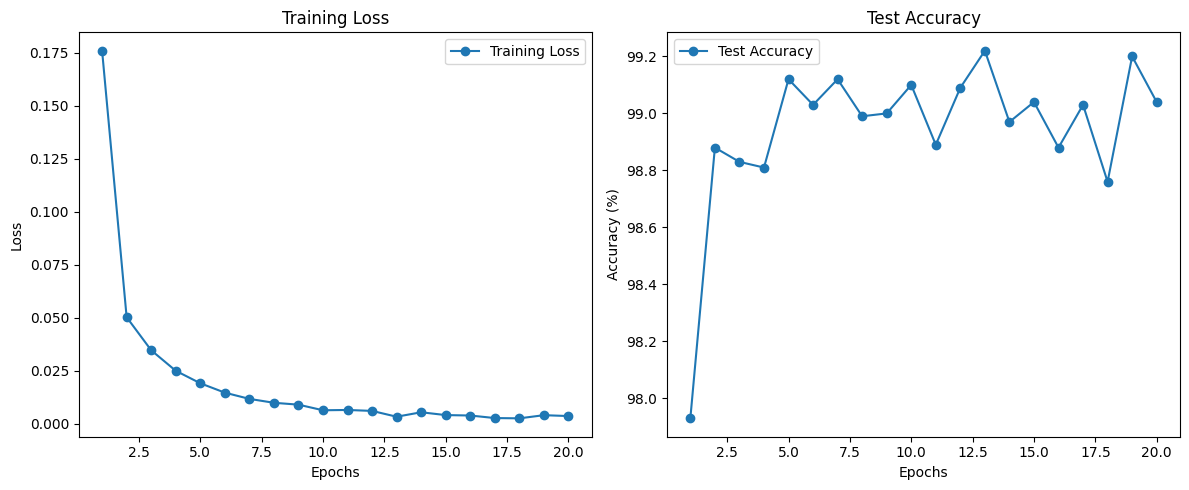

In [ ]:
plt.figure(figsize=(12, 5))

# Plot training loss
plt.subplot(1, 2, 1)
plt.plot(range(1, epochs + 1), train_losses, marker='o', label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.legend()

# Plot test accuracy
plt.subplot(1, 2, 2)
plt.plot(range(1, epochs + 1), test_accuracies, marker='o', label='Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.title('Test Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


# Step : 8 == Model evaluating.....

In [ ]:
model.eval()
all_preds = []  # List to store all predictions
all_labels = []  # List to store all true labels

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)

        all_preds.extend(predicted.cpu().numpy())  # Add predictions to the list
        all_labels.extend(labels.cpu().numpy())  # Add labels to the list

test_accuracy = 100 * sum(1 for x, y in zip(all_preds, all_labels) if x == y) / len(all_labels)
print(f"Test Accuracy: {test_accuracy:.2f}%")

Test Accuracy: 99.04%


# Step : 9 == Prepare report

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       980
           1       0.99      1.00      1.00      1135
           2       0.99      0.99      0.99      1032
           3       0.98      0.99      0.98      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.97      0.98       892
           6       1.00      0.98      0.99       958
           7       0.98      1.00      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000


Prediction Distribution:


<ipython-input-30-bb544ee04bb5>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=predictions, order=classes, palette="viridis")


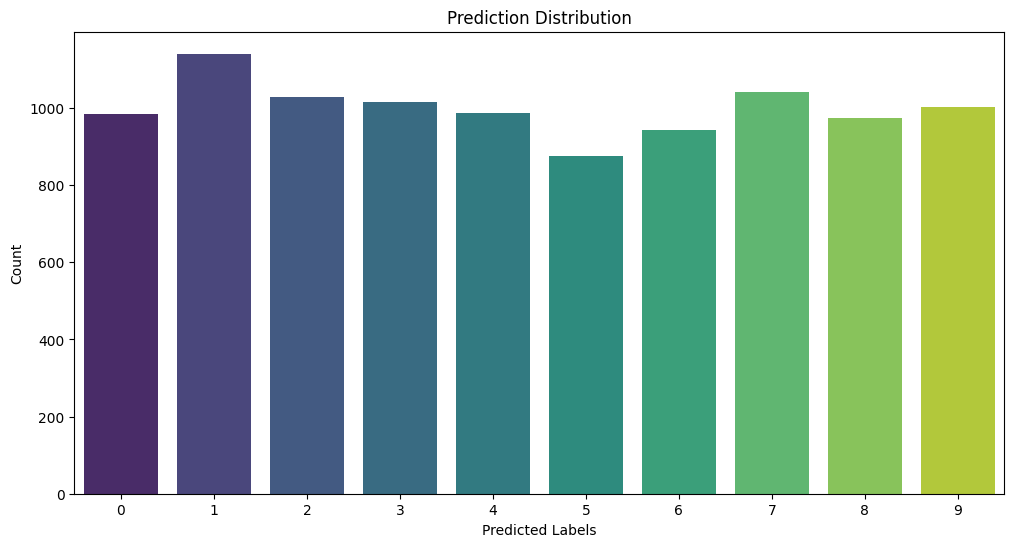

In [ ]:
!pip install scikit-learn # Install scikit-learn if you haven't already
from sklearn.metrics import classification_report # Import the classification_report function

print("Classification Report:")
print(classification_report(all_labels, all_preds, target_names=[str(c) for c in range(10)])) # Assuming classes are 0-9


def plot_prediction_distribution(predictions, classes):
    import seaborn as sns # Import seaborn within the function
    import matplotlib.pyplot as plt # Import matplotlib within the function
    plt.figure(figsize=(12, 6))
    sns.countplot(x=predictions, order=classes, palette="viridis")
    plt.title("Prediction Distribution")
    plt.xlabel("Predicted Labels")
    plt.ylabel("Count")
    plt.show()

print("\nPrediction Distribution:")
plot_prediction_distribution(all_preds, classes=range(10)) # Assuming classes are 0-9

# Step : 10 == Save the model.......

In [ ]:
torch.save(model.state_dict(), 'mnist_cnn_model.pth')
print("Model saved as 'mnist_cnn_model.pth'")

Model saved as 'mnist_cnn_model.pth'
